In [1]:
import dask.array as da
from pathlib import Path

# notebook
import stitch_utils
import io_utils
from io_utils import TileData

# notebook reload
%load_ext autoreload
%autoreload 2

bucket_name = "aind-open-data"

In [2]:
save_dir = Path(f'/home/matt.davis/code/hcr-stich/xml_data/')
xmls = io_utils.get_thyme_xmls()

Skipping HCR_736963_2024-12-07_13-00-00/stitching_single_channel.xml because it already exists
Skipping HCR_736963_2024-12-07_13-00-00/stitching_spot_channels.xml because it already exists
Skipping HCR_736963_2024-12-13_13-00-00/stitching_single_channel.xml because it already exists
Skipping HCR_736963_2024-12-13_13-00-00/stitching_spot_channels.xml because it already exists
Skipping HCR_736963_2024-12-19_13-00-00/stitching_single_channel.xml because it already exists
Skipping HCR_736963_2024-12-19_13-00-00/stitching_spot_channels.xml because it already exists
Skipping HCR_736963_2025-01-09_13-00-00/stitching_single_channel.xml because it already exists
Skipping HCR_736963_2025-01-09_13-00-00/stitching_spot_channels.xml because it already exists
Skipping HCR_736963_2025-01-22_13-00-00/stitching_single_channel.xml because it already exists
Skipping HCR_736963_2025-01-22_13-00-00/stitching_spot_channels.xml because it already exists


In [53]:
xml_path = "/allen/programs/mindscope/workgroups/learning/mattd/hcr/bigstitcher_763963_r4.xml"

In [6]:
round_n = 1
xml_path = Path(save_dir / xmls[round_n]["spot"])
print(xml_path)
data = io_utils.parse_bigstitcher_xml(xml_path)

/home/matt.davis/code/hcr-stich/xml_data/HCR_736963_2024-12-07_13-00-00/stitching_spot_channels.xml
HCR_736963_2024-12-07_13-00-00/radial_correction.ome.zarr/
N tiles: 278
488: 68
514: 68
561: 68
594: 68
405: 6


In [7]:
data

{'tile_names': {0: 'Tile_X_0000_Y_0000_Z_0000_ch_488.zarr',
  1: 'Tile_X_0000_Y_0000_Z_0000_ch_514.zarr',
  2: 'Tile_X_0000_Y_0000_Z_0000_ch_561.zarr',
  3: 'Tile_X_0000_Y_0000_Z_0000_ch_594.zarr',
  4: 'Tile_X_0000_Y_0001_Z_0000_ch_488.zarr',
  5: 'Tile_X_0000_Y_0001_Z_0000_ch_514.zarr',
  6: 'Tile_X_0000_Y_0001_Z_0000_ch_561.zarr',
  7: 'Tile_X_0000_Y_0001_Z_0000_ch_594.zarr',
  8: 'Tile_X_0000_Y_0002_Z_0000_ch_488.zarr',
  9: 'Tile_X_0000_Y_0002_Z_0000_ch_514.zarr',
  10: 'Tile_X_0000_Y_0002_Z_0000_ch_561.zarr',
  11: 'Tile_X_0000_Y_0002_Z_0000_ch_594.zarr',
  12: 'Tile_X_0000_Y_0003_Z_0000_ch_488.zarr',
  13: 'Tile_X_0000_Y_0003_Z_0000_ch_514.zarr',
  14: 'Tile_X_0000_Y_0003_Z_0000_ch_561.zarr',
  15: 'Tile_X_0000_Y_0003_Z_0000_ch_594.zarr',
  16: 'Tile_X_0000_Y_0004_Z_0000_ch_488.zarr',
  17: 'Tile_X_0000_Y_0004_Z_0000_ch_514.zarr',
  18: 'Tile_X_0000_Y_0004_Z_0000_ch_561.zarr',
  19: 'Tile_X_0000_Y_0004_Z_0000_ch_594.zarr',
  20: 'Tile_X_0000_Y_0005_Z_0000_ch_488.zarr',
  21: 'Ti

# Test TileData

In [15]:


tile_name = 'Tile_X_0005_Y_0003_Z_0000_ch_405.zarr'
bucket_name = 'aind-open-data'
dataset_path = 'HCR_736963_2024-12-07_13-00-00/radial_correction.ome.zarr/'
pyramid_level = 2
tile = TileData(tile_name=tile_name, 
                bucket_name=bucket_name, 
                dataset_path=dataset_path,
                pyramid_level=pyramid_level)


In [31]:
print(tile.shape)

(829, 955, 955)


In [5]:
tile.get_slice(100)

array([[89, 88, 88, ..., 90, 89, 89],
       [88, 88, 88, ..., 89, 90, 89],
       [88, 89, 89, ..., 89, 89, 89],
       ...,
       [89, 89, 89, ..., 89, 90, 90],
       [89, 89, 89, ..., 89, 90, 90],
       [89, 89, 89, ..., 89, 89, 89]], shape=(238, 238), dtype=uint16)

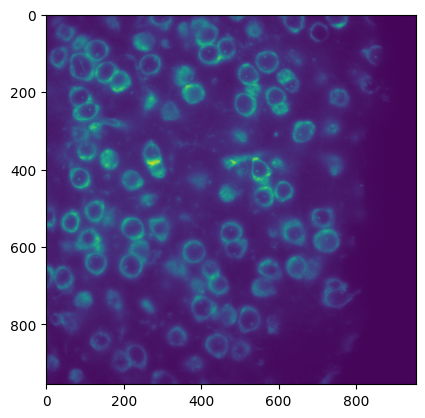

In [16]:
import matplotlib.pyplot as plt
plt.imshow(tile.get_slice(200))
plt.show()

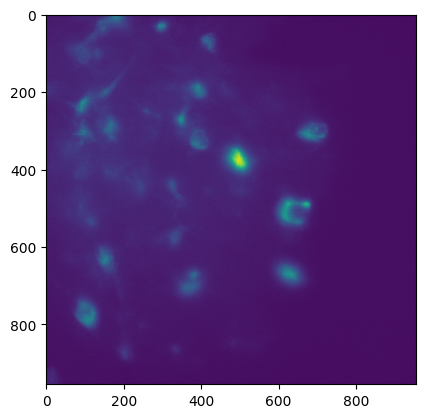

In [33]:
plt.imshow(tile.project(axis='z', method='max', start=100, end=101))
plt.show()

In [41]:
tile.calculate_max_slice(level_to_use=1)

{0: {'z': np.int64(804), 'y': np.int64(326), 'x': np.int64(326)},
 1: {'z': np.int64(402), 'y': np.int64(163), 'x': np.int64(163)},
 2: {'z': np.int64(0), 'y': np.int64(0), 'x': np.int64(0)},
 3: {'z': np.int64(0), 'y': np.int64(0), 'x': np.int64(0)}}

In [52]:
tile.calculate_max_slice(level_to_use=1)

level_to_use: 1, level: 2
level_to_use: 1, level: 3


{0: {'z': 582, 'y': 672, 'x': 628},
 1: {'z': 291, 'y': 336, 'x': 314},
 2: {'z': 145, 'y': 168, 'x': 157},
 3: {'z': 72, 'y': 84, 'x': 78}}

In [51]:
tile.calculate_max_slice(level_to_use=2)

level_to_use: 2, level: 3


{0: {'z': 580, 'y': 672, 'x': 624},
 1: {'z': 290, 'y': 336, 'x': 312},
 2: {'z': 145, 'y': 168, 'x': 156},
 3: {'z': 72, 'y': 84, 'x': 78}}

In [39]:
tile.calculate_max_slice(level_to_use=3)

{0: {'z': np.int64(800), 'y': np.int64(320), 'x': np.int64(320)},
 1: {'z': np.int64(400), 'y': np.int64(160), 'x': np.int64(160)},
 2: {'z': np.int64(200), 'y': np.int64(80), 'x': np.int64(80)},
 3: {'z': np.int64(100), 'y': np.int64(40), 'x': np.int64(40)}}

In [54]:
xml_path = "/allen/programs/mindscope/workgroups/learning/mattd/hcr/bigstitcher_763963_r4.xml"
data = io_utils.parse_bigstitcher_xml(xml_path)
data

HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/
N tiles: 61
405: 61


{'tile_names': {0: 'Tile_X_0000_Y_0000_Z_0000_ch_405.zarr',
  1: 'Tile_X_0000_Y_0001_Z_0000_ch_405.zarr',
  2: 'Tile_X_0000_Y_0002_Z_0000_ch_405.zarr',
  3: 'Tile_X_0000_Y_0003_Z_0000_ch_405.zarr',
  4: 'Tile_X_0000_Y_0004_Z_0000_ch_405.zarr',
  5: 'Tile_X_0000_Y_0005_Z_0000_ch_405.zarr',
  6: 'Tile_X_0000_Y_0006_Z_0000_ch_405.zarr',
  7: 'Tile_X_0000_Y_0007_Z_0000_ch_405.zarr',
  8: 'Tile_X_0000_Y_0008_Z_0000_ch_405.zarr',
  9: 'Tile_X_0001_Y_0000_Z_0000_ch_405.zarr',
  10: 'Tile_X_0001_Y_0001_Z_0000_ch_405.zarr',
  11: 'Tile_X_0001_Y_0002_Z_0000_ch_405.zarr',
  12: 'Tile_X_0001_Y_0003_Z_0000_ch_405.zarr',
  13: 'Tile_X_0001_Y_0004_Z_0000_ch_405.zarr',
  14: 'Tile_X_0001_Y_0005_Z_0000_ch_405.zarr',
  15: 'Tile_X_0001_Y_0006_Z_0000_ch_405.zarr',
  16: 'Tile_X_0001_Y_0007_Z_0000_ch_405.zarr',
  17: 'Tile_X_0001_Y_0008_Z_0000_ch_405.zarr',
  18: 'Tile_X_0002_Y_0000_Z_0000_ch_405.zarr',
  19: 'Tile_X_0002_Y_0001_Z_0000_ch_405.zarr',
  20: 'Tile_X_0002_Y_0002_Z_0000_ch_405.zarr',
  21: 'Ti

In [70]:
# adjacent pairs
pairs = stitch_utils.get_all_adjacent_pairs(data["tile_names"], include_diagonals=False)

In [77]:
tile1_name = 'Tile_X_0000_Y_0007_Z_0000_ch_405.zarr'
tile2_name = 'Tile_X_0001_Y_0007_Z_0000_ch_405.zarr'
bucket_name = 'aind-open-data'

tile1_id, tile2_id

(15, 16)

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Transformed Tile Boundaries\nTile 1 shape: (237, 240, 240) (level 3)\nTile 2 shape: (237, 240, 240) (level 3)'}>)

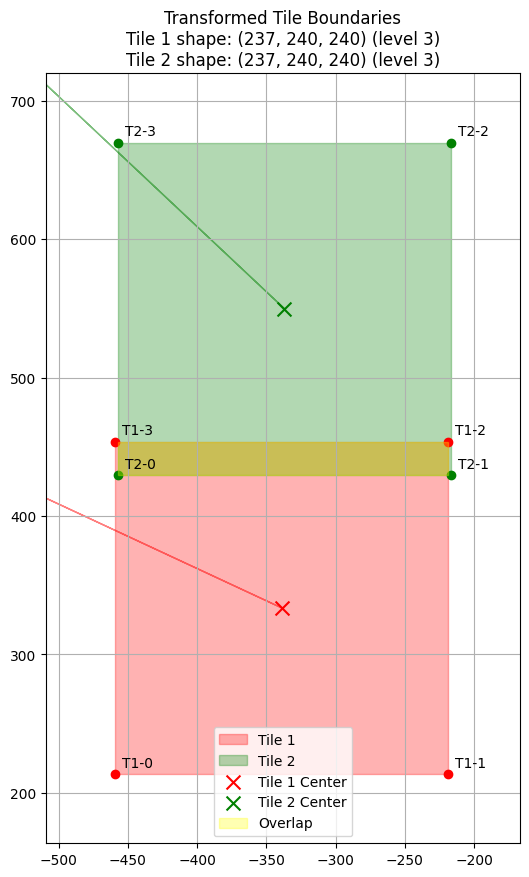

In [106]:
stitch_utils.plot_transformed_tiles(tile1, tile2, transform1, transform2, 50)

In [90]:
stitch_utils.analyze_tile_overlap(tile1, tile2, transform1, transform2, 50)


[[-918.07404982  427.36217371]
 [-438.07404982  907.36217371]] [[-913.90867599  859.3354767 ]
 [-433.90867599 1339.3354767 ]]
Tile 1 global bbox: [[-918.07404982  427.36217371]
 [-438.07404982  907.36217371]]
Tile 2 global bbox: [[-913.90867599  859.3354767 ]
 [-433.90867599 1339.3354767 ]]
Overlap bbox: [[-963.90867599  809.3354767 ]
 [-388.07404982  957.36217371]]
Tile 1 local coords:
[[-45.83462617 381.97330299]
 [530.         381.97330299]
 [530.         530.        ]
 [-45.83462617 530.        ]]
Tile 2 local coords:
[[-50.         -50.        ]
 [525.83462617 -50.        ]
 [525.83462617  98.02669701]
 [-50.          98.02669701]]


{'overlap_bbox': array([[-963.90867599,  809.3354767 ],
        [-388.07404982,  957.36217371]]),
 'tile1_bounds': (381, 480, 0, 480),
 'tile2_bounds': (0, 99, 0, 480),
 'global_bbox1': array([[-918.07404982,  427.36217371],
        [-438.07404982,  907.36217371]]),
 'global_bbox2': array([[-913.90867599,  859.3354767 ],
        [-433.90867599, 1339.3354767 ]]),
 'tile1_coords': array([[-45.83462617, 530.        , 530.        , -45.83462617],
        [381.97330299, 381.97330299, 530.        , 530.        ]]),
 'tile2_coords': array([[-50.        , 525.83462617, 525.83462617, -50.        ],
        [-50.        , -50.        ,  98.02669701,  98.02669701]])}

In [75]:
transform1
transform2


array([[ 1.00000000e+00,  1.59131156e-32,  2.64779439e-32,
        -3.63486754e+03],
       [-1.06759489e-32,  1.00000000e+00, -1.84637283e-31,
         5.08112554e+03],
       [ 1.51788985e-33, -6.90814862e-32,  1.00000000e+00,
         2.96662902e+01]])

In [178]:
def figure_tile_overlap_4_views(tile1_name, tile2_name, data, pyramid_level=1, bucket_name='aind-open-data'):
# Create TileData objects
    tile1 = TileData(tile1_name, bucket_name, data["dataset_path"], pyramid_level=pyramid_level).connect()
    tile2 = TileData(tile2_name, bucket_name, data["dataset_path"], pyramid_level=pyramid_level).connect()


    # look up the values in data["tile_names"] to get the ids (which is the key)
    tile1_id = list(data["tile_names"].keys())[list(data["tile_names"].values()).index(tile1_name)]
    tile2_id = list(data["tile_names"].keys())[list(data["tile_names"].values()).index(tile2_name)]

    # Get transforms for the tiles
    transform1 = data["net_transforms"][tile1_id]
    transform2 = data["net_transforms"][tile2_id]

    n_cols = 4
    size = 5
    fig, axes = plt.subplots(1, n_cols, figsize=(size,size), sharey=True, constrained_layout=True)
    axes = axes.flatten()

    # Calculate z-slices at 20%, 40%, 60%, and 80% through the z dimension
    z_min = max(0, min(tile1.shape[0], tile2.shape[0]))
    z_slices = [int(z_min * p) for p in [0.2, 0.4, 0.6, 0.8]]

    for i, z_slice in enumerate(z_slices):
        result = stitch_utils.visualize_tile_overlap(tile1, tile2, transform1, transform2, 
                                                    z_slice=z_slice, padding=50) # 1=50, 2 = 30, 3 = 20
        
        # Check if overlap is longer in x than y and transpose if needed
        composite = result['composite']
        overlap_shape = composite.shape
        print(overlap_shape)
        if overlap_shape[1] > overlap_shape[0]:  # if width > height
            # transpose, but leave 3 dims
            composite = composite.transpose(1, 0, 2)
        
        axes[i].imshow(composite)
        axes[i].set_title(f'Z={z_slice}')
        axes[i].axis('on')
    tile1_name = stitch_utils.parse_tile_name(tile1.tile_name)
    tile2_name = stitch_utils.parse_tile_name(tile2.tile_name)
    # add whitespace above title
    plt.suptitle(f'Tile Overlap\nRed={tile1_name}, Green={tile2_name}', y=0.98)
    plt.tight_layout()
    #plt.subplots_adjust(top=0.8)
    plt.show()

In [176]:
figure_tile_overlap_4_views()

Composite dimensions: 112x339

Placement coordinates:
Tile 1: y=48, x=0, shape=(240, 62)
Tile 2: y=50, x=50, shape=(240, 62)
(339, 112, 3)
Composite dimensions: 112x339

Placement coordinates:
Tile 1: y=48, x=0, shape=(240, 62)
Tile 2: y=50, x=50, shape=(240, 62)
(339, 112, 3)
Composite dimensions: 112x339

Placement coordinates:
Tile 1: y=48, x=0, shape=(240, 62)
Tile 2: y=50, x=50, shape=(240, 62)
(339, 112, 3)
Composite dimensions: 112x339

Placement coordinates:
Tile 1: y=48, x=0, shape=(240, 62)
Tile 2: y=50, x=50, shape=(240, 62)
(339, 112, 3)


/tmp/ipykernel_25754/324180982.py:43: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


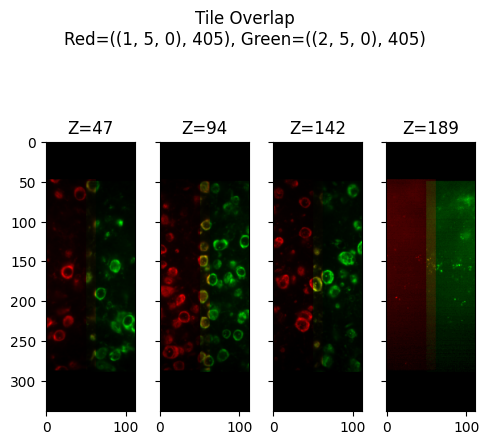

In [179]:
pair_n = 28
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
pyramid_level = 3

figure_tile_overlap_4_views(tile1_name, tile2_name, data, pyramid_level=pyramid_level)




In [266]:
levels = [0, 1, 2, 3]

# pyramids sscale 2**level
# 20 is good for three, so make 20 * 2**(3-level)


pads = []
for level in levels:
    pad = 16 * 2**(3-level)
    pads.append(pad)

pads


[128, 64, 32, 16]

## Paired Tiles

In [216]:
# Create TileData objects
tile1 = TileData(tile1_name, bucket_name, data["dataset_path"], pyramid_level=pyramid_level).connect()
tile2 = TileData(tile2_name, bucket_name, data["dataset_path"], pyramid_level=pyramid_level).connect()

# Get tile IDs
tile1_id = list(data["tile_names"].keys())[list(data["tile_names"].values()).index(tile1_name)]
tile2_id = list(data["tile_names"].keys())[list(data["tile_names"].values()).index(tile2_name)]

# Get transforms
transform1 = data["net_transforms"][tile1_id]
transform2 = data["net_transforms"][tile2_id]

# Parse tile names for display
parsed_name1 = stitch_utils.parse_tile_name(tile1_name)
parsed_name2 = stitch_utils.parse_tile_name(tile2_name)

# Create PairedTiles object
paired = io_utils.PairedTiles(tile1, tile2, transform1, transform2, names=(parsed_name1, parsed_name2))


Composite shape: [238 454 242]
Tile1 offset: [0 0 0]
Tile2 offset: [  0 213   1]
Tile1 shape: (240, 240, 237), non-zero pixels: 13651200
Tile2 shape: (240, 240, 237), non-zero pixels: 13651200
Tile1 percentiles: 1% = 89.0, 99% = 562.0
Tile1 normalized range: 0.0 to 1.0
Tile2 percentiles: 1% = 89.0, 99% = 613.0
Tile2 normalized range: 0.0 to 1.0
Tile1 offset in composite: [0 0 0]
Tile2 offset in composite: [  0 213   1]
Available space: 238, 240, 237
Available space: 238, 240, 237
Overlap volume: 1446127 voxels (5.53% of composite)
Red channel (Tile1) max value in composite: 1.0
Green channel (Tile2) max value in composite: 1.0


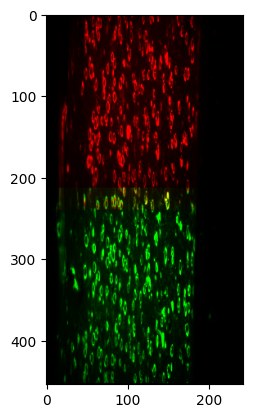

In [220]:
plt.imshow(paired.composite[100,:,:,:])

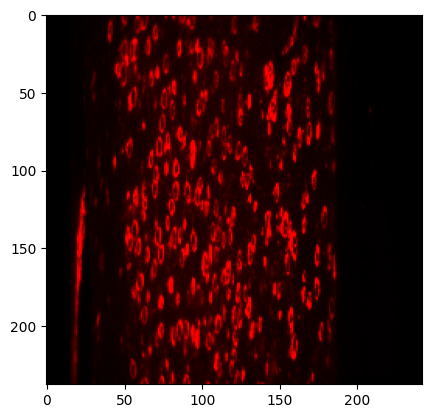

In [219]:
plt.imshow(paired.composite[:,100,:,:])

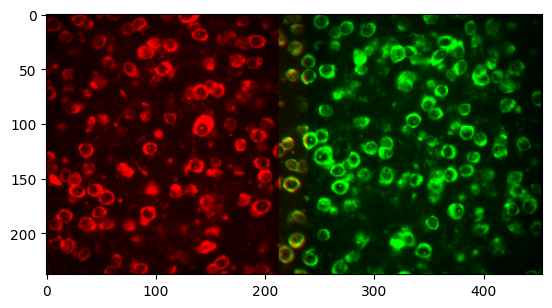

In [218]:
plt.imshow(paired.composite[:,:,100,:])

Composite shape: [238 454 242]
Tile1 offset: [0 0 0]
Tile2 offset: [  0 213   1]
Tile1 shape: (240, 240, 237), non-zero pixels: 13651200
Tile2 shape: (240, 240, 237), non-zero pixels: 13651200
Tile1 percentiles: 1% = 89.0, 99% = 562.0
Tile1 normalized range: 0.0 to 1.0
Tile2 percentiles: 1% = 89.0, 99% = 613.0
Tile2 normalized range: 0.0 to 1.0
Tile1 offset in composite: [0 0 0]
Tile2 offset in composite: [  0 213   1]
Available space: 238, 240, 237
Available space: 238, 240, 237
Overlap volume: 1446127 voxels (5.53% of composite)
Red channel (Tile1) max value in composite: 1.0
Green channel (Tile2) max value in composite: 1.0
xy (238, 454, 3)
zx (238, 242, 3)
zy (454, 242, 3)


(<io_utils.PairedTiles at 0x7f5f6698aa50>,
 <Figure size 1800x600 with 3 Axes>,
 array([<Axes: title={'center': 'XY slice at Z=119'}, xlabel='Y', ylabel='X'>,
        <Axes: title={'center': 'XZ slice at Y=226'}, xlabel='Z', ylabel='X'>,
        <Axes: title={'center': 'YZ slice at X=121'}, xlabel='Z', ylabel='Y'>],
       dtype=object))

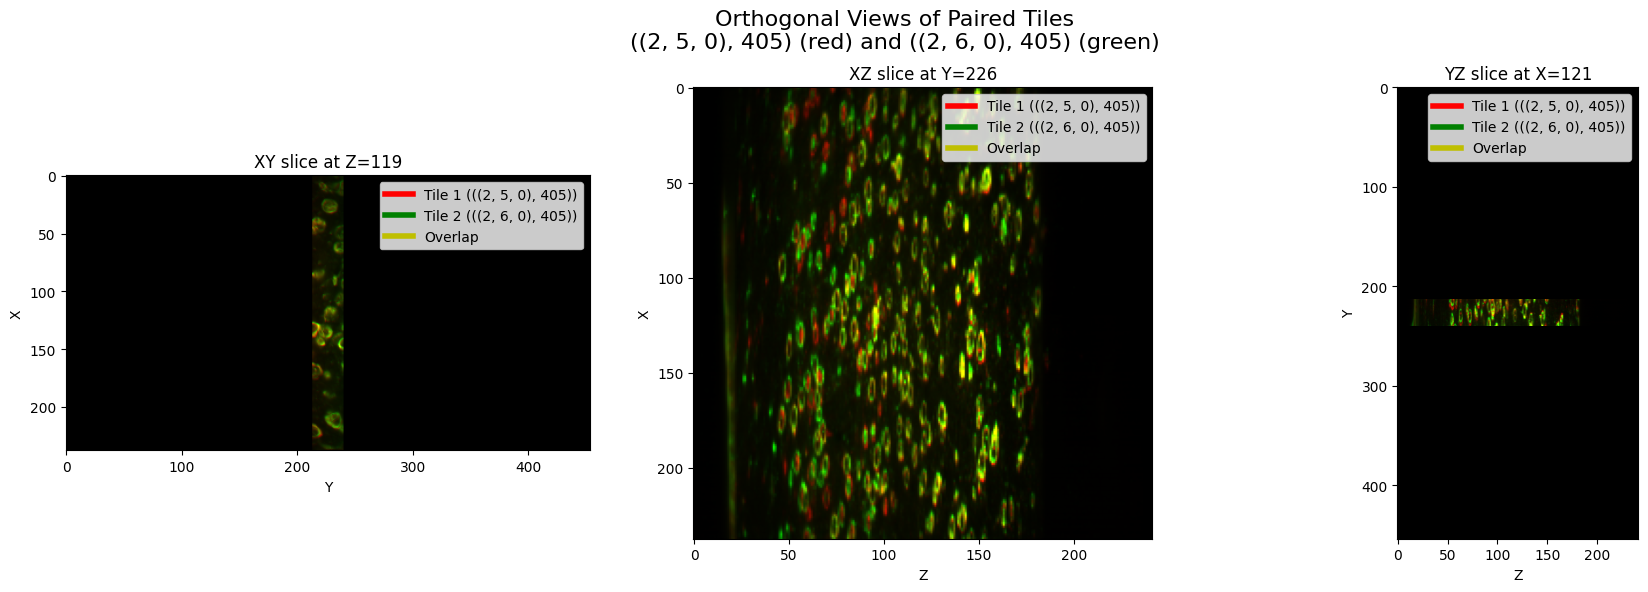

In [227]:
pair_n = 44
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
pyramid_level = 3
visualize_paired_tiles(tile1_name, tile2_name, data, pyramid_level=pyramid_level, overlap_only=True)






Composite shape: [238 454 242]
Tile1 offset: [0 0 0]
Tile2 offset: [  0 213   1]
Tile1 shape: (240, 240, 237), non-zero pixels: 13651200
Tile2 shape: (240, 240, 237), non-zero pixels: 13651200
Tile1 percentiles: 1% = 89.0, 99% = 562.0
Tile1 normalized range: 0.0 to 1.0
Tile2 percentiles: 1% = 89.0, 99% = 613.0
Tile2 normalized range: 0.0 to 1.0
Tile1 offset in composite: [0 0 0]
Tile2 offset in composite: [  0 213   1]
Available space: 238, 240, 237
Available space: 238, 240, 237
Composite shape: [238 454 242]
Overlap volume: 1446127 voxels (5.53% of composite)
Red channel (Tile1) max value in composite: 1.0
Green channel (Tile2) max value in composite: 1.0


(<io_utils.PairedTiles at 0x7f5d972d7090>,
 <Figure size 1800x600 with 3 Axes>,
 array([<Axes: title={'center': 'XY slice at Z=121'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'ZX slice at Y=227'}, xlabel='X', ylabel='Z'>,
        <Axes: title={'center': 'ZY slice at X=119'}, xlabel='Y', ylabel='Z'>],
       dtype=object))

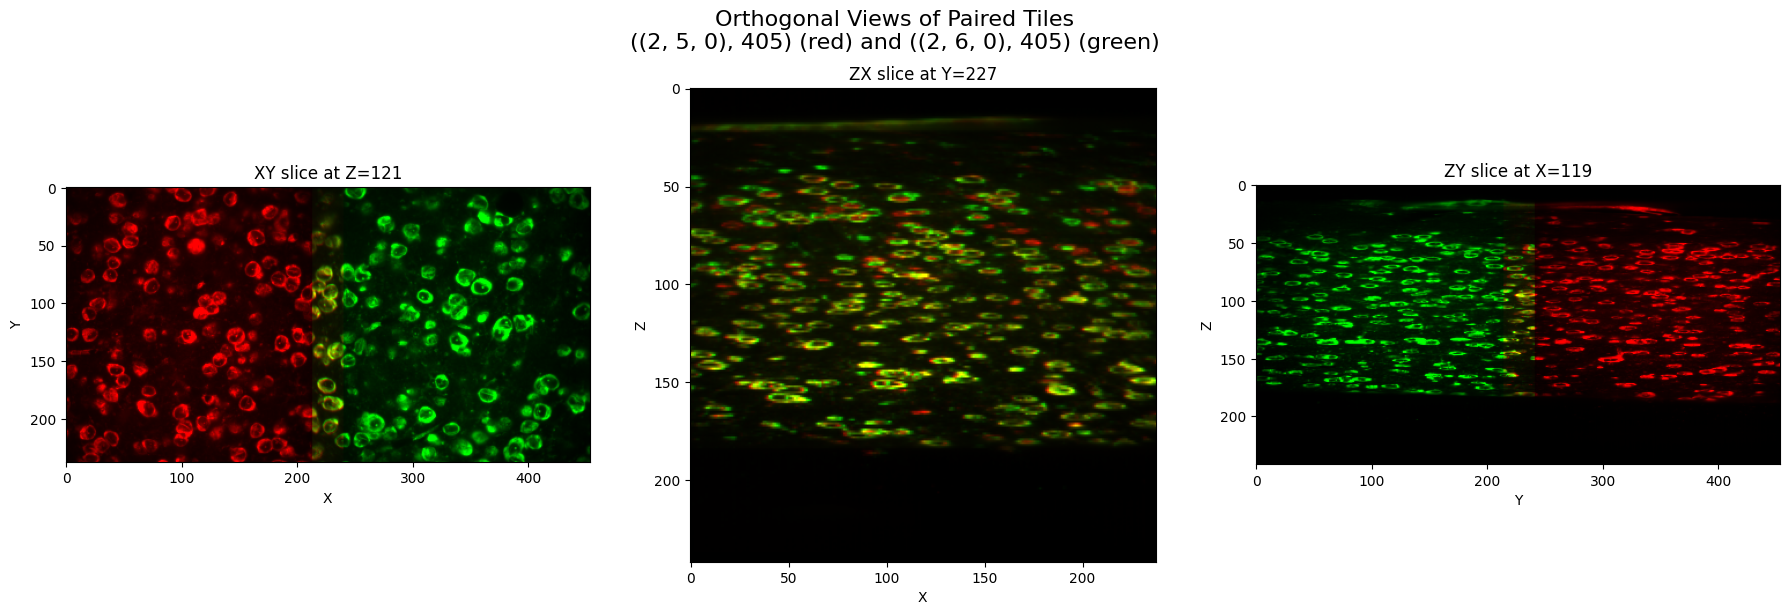

In [306]:
def visualize_paired_tiles(tile1_name, tile2_name, data, pyramid_level=1, 
                           bucket_name='aind-open-data', overlap_only=False, padding='auto'):

    # 20 is good for pyramid level 3, scale up for lower levels by factor of 4
    if padding == 'auto':
        padding = 16 * 2**(3-pyramid_level)
    # Create TileData objects
    tile1 = TileData(tile1_name, bucket_name, data["dataset_path"], pyramid_level=pyramid_level).connect()
    tile2 = TileData(tile2_name, bucket_name, data["dataset_path"], pyramid_level=pyramid_level).connect()

    # Get tile IDs
    tile1_id = list(data["tile_names"].keys())[list(data["tile_names"].values()).index(tile1_name)]
    tile2_id = list(data["tile_names"].keys())[list(data["tile_names"].values()).index(tile2_name)]

    # Get transforms
    transform1 = data["net_transforms"][tile1_id]
    transform2 = data["net_transforms"][tile2_id]
    
    # Parse tile names for display
    parsed_name1 = stitch_utils.parse_tile_name(tile1_name)
    parsed_name2 = stitch_utils.parse_tile_name(tile2_name)
    
    # Create PairedTiles object
    paired = io_utils.PairedTiles(tile1, tile2, transform1, transform2, names=(parsed_name1, parsed_name2))
    
    # Visualize orthogonal views
    fig, axes = paired.visualize_orthogonal_views(overlap_only=overlap_only, padding=padding)
    
    return paired, fig, axes

pair_n = 44
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
pyramid_level = 3
visualize_paired_tiles(tile1_name, tile2_name, data, pyramid_level=pyramid_level, overlap_only=False)

Composite shape: [467 242 242]
Tile1 offset: [0 0 1]
Tile2 offset: [229   1   0]
Tile1 shape: (240, 240, 237), non-zero pixels: 13651200
Tile2 shape: (240, 240, 237), non-zero pixels: 13651200
Tile1 percentiles: 1% = 89.0, 99% = 562.0
Tile1 normalized range: 0.0 to 1.0
Tile2 percentiles: 1% = 90.0, 99% = 605.0
Tile2 normalized range: 0.0 to 1.0
Tile1 offset in composite: [0 0 1]
Tile2 offset in composite: [229   1   0]
Available space: 238, 240, 237
Overlap volume: 587654 voxels (2.15% of composite)
Red channel (Tile1) max value in composite: 1.0
Green channel (Tile2) max value in composite: 1.0


(<io_utils.PairedTiles at 0x7f59e4fc6ad0>,
 <Figure size 1800x600 with 3 Axes>,
 array([<Axes: title={'center': 'XY slice at Z=121'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'ZX slice at Y=121'}, xlabel='X', ylabel='Z'>,
        <Axes: title={'center': 'ZY slice at X=233'}, xlabel='Y', ylabel='Z'>],
       dtype=object))

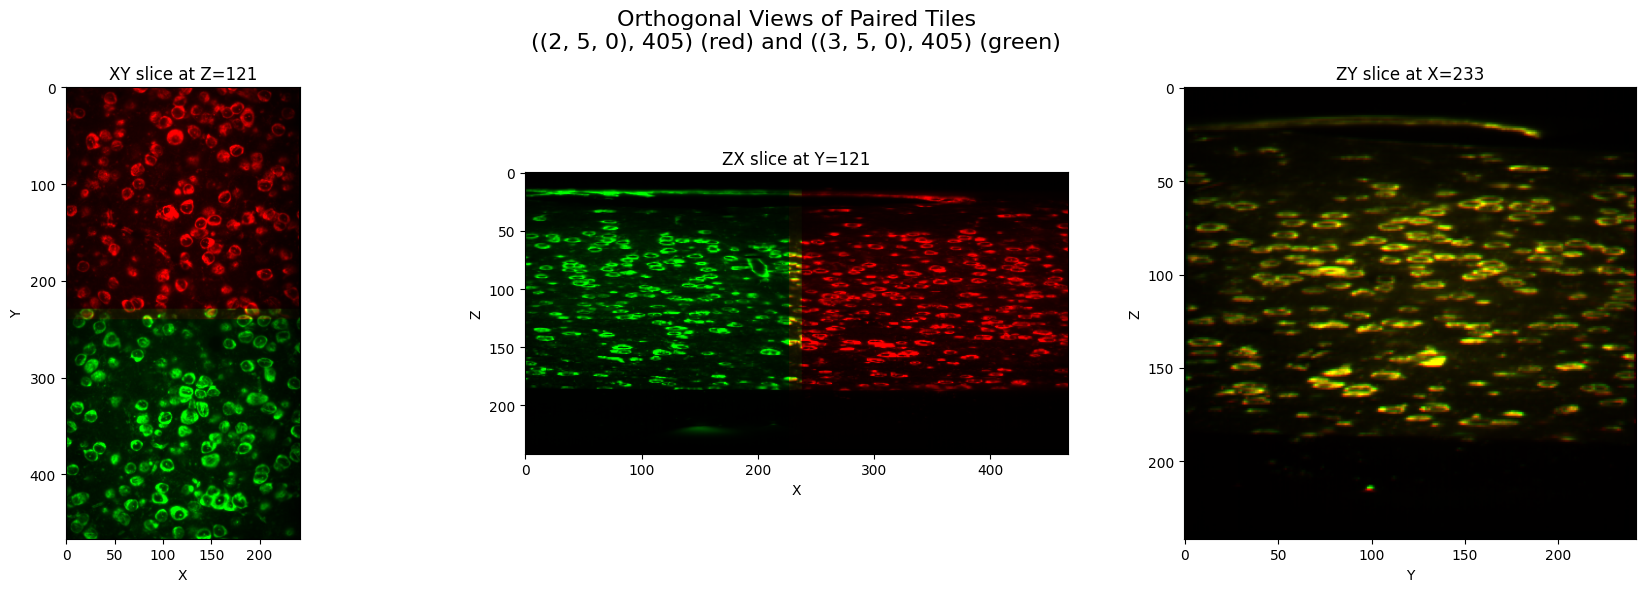

In [311]:
pair_n = 45
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
pyramid_level = 3
visualize_paired_tiles(tile1_name, tile2_name, data, pyramid_level=pyramid_level, overlap_only=True)

Composite shape: [240 460 242]
Tile1 offset: [2 0 0]
Tile2 offset: [  0 219   1]
Tile1 shape: (240, 240, 237), non-zero pixels: 13651200
Tile2 shape: (240, 240, 237), non-zero pixels: 13651200
Tile1 percentiles: 1% = 90.0, 99% = 3721.0
Tile1 normalized range: 0.0 to 1.0
Tile2 percentiles: 1% = 89.0, 99% = 562.0
Tile2 normalized range: 0.0 to 1.0
Tile1 offset in composite: [2 0 0]
Tile2 offset in composite: [  0 219   1]
Available space: 238, 240, 237
Overlap volume: 1067550 voxels (4.00% of composite)
Red channel (Tile1) max value in composite: 1.0
Green channel (Tile2) max value in composite: 1.0


(<io_utils.PairedTiles at 0x7f5f64a71950>,
 <Figure size 1800x600 with 3 Axes>,
 array([<Axes: title={'center': 'XY slice at Z=121'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'ZX slice at Y=230'}, xlabel='Z', ylabel='X'>,
        <Axes: title={'center': 'ZY slice at X=120'}, xlabel='Z', ylabel='Y'>],
       dtype=object))

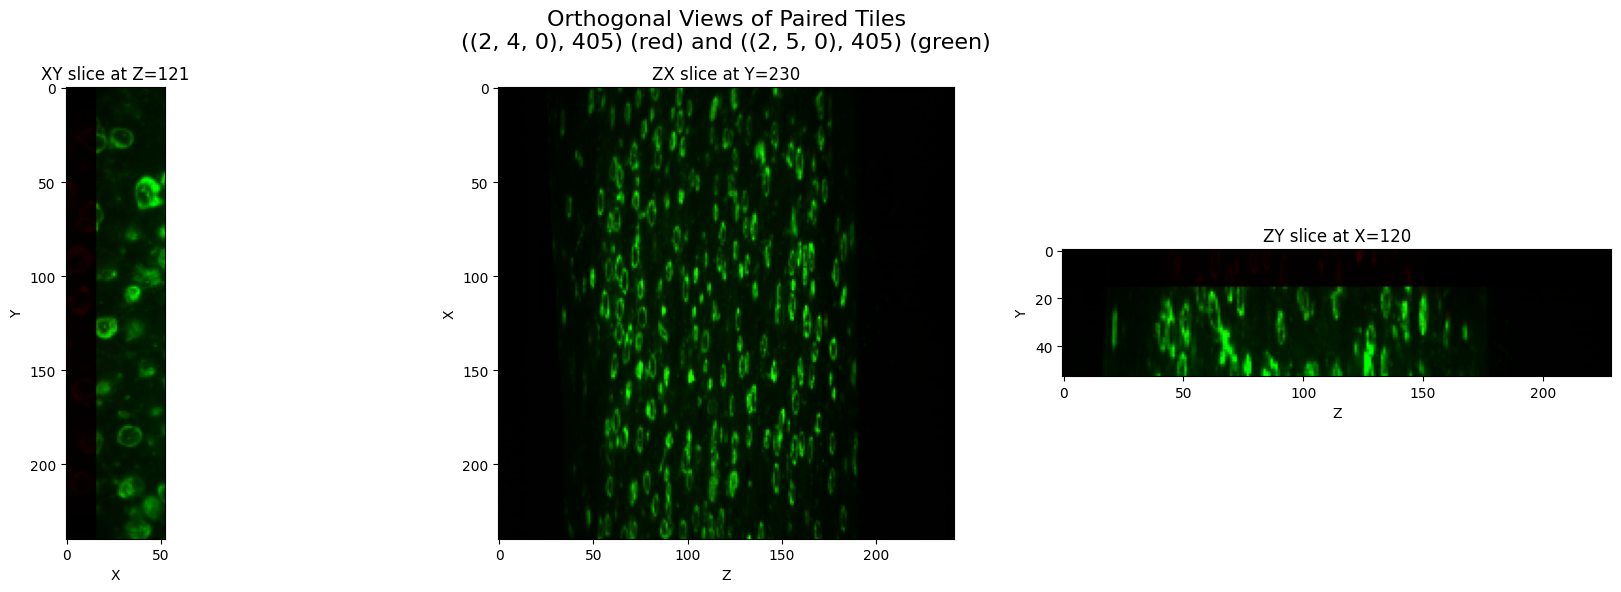

In [275]:
pair_n = 42
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
pyramid_level = 3
visualize_paired_tiles(tile1_name, tile2_name, data, pyramid_level=pyramid_level, overlap_only=True)


Composite shape: [238 454 242]
Tile1 offset: [0 0 0]
Tile2 offset: [  0 213   1]
Tile1 shape: (240, 240, 237), non-zero pixels: 13651200
Tile2 shape: (240, 240, 237), non-zero pixels: 13651200
Tile1 percentiles: 1% = 89.0, 99% = 562.0
Tile1 normalized range: 0.0 to 1.0
Tile2 percentiles: 1% = 89.0, 99% = 613.0
Tile2 normalized range: 0.0 to 1.0
Tile1 offset in composite: [0 0 0]
Tile2 offset in composite: [  0 213   1]
Available space: 238, 240, 237
Available space: 238, 240, 237
Overlap volume: 1446127 voxels (5.53% of composite)
Red channel (Tile1) max value in composite: 1.0
Green channel (Tile2) max value in composite: 1.0


(<io_utils.PairedTiles at 0x7f5f64dd9890>,
 <Figure size 1800x600 with 3 Axes>,
 array([<Axes: title={'center': 'XY slice at Z=150'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'ZX slice at Y=227'}, xlabel='X', ylabel='Z'>,
        <Axes: title={'center': 'ZY slice at X=119'}, xlabel='Y', ylabel='Z'>],
       dtype=object))

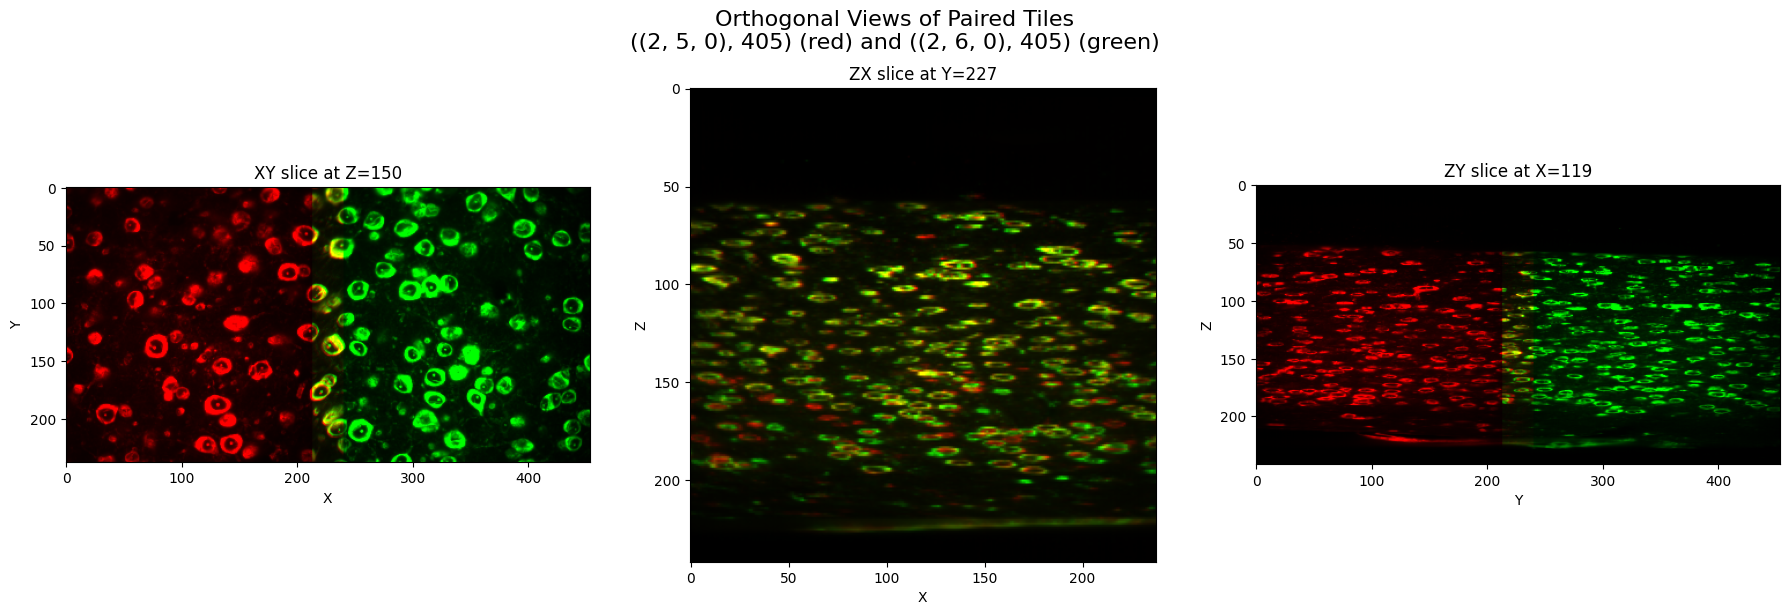

In [283]:
pair_n = 44
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
pyramid_level = 3
visualize_paired_tiles(tile1_name, tile2_name, data, pyramid_level=pyramid_level, overlap_only=False)
